In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
data = pd.read_csv('/home/maryam/Documents/Thesis/Service Report-Week.csv')
dataTotalTraffic = data[["Total Traffic"]]

     Total Traffic
0            16.75
1            19.29
2            12.06
3            13.09
4            14.12
..             ...
124          19.37
125          12.92
126          16.84
127          17.94
128          13.31

[129 rows x 1 columns]


Text(0, 0.5, 'Total Traffic')

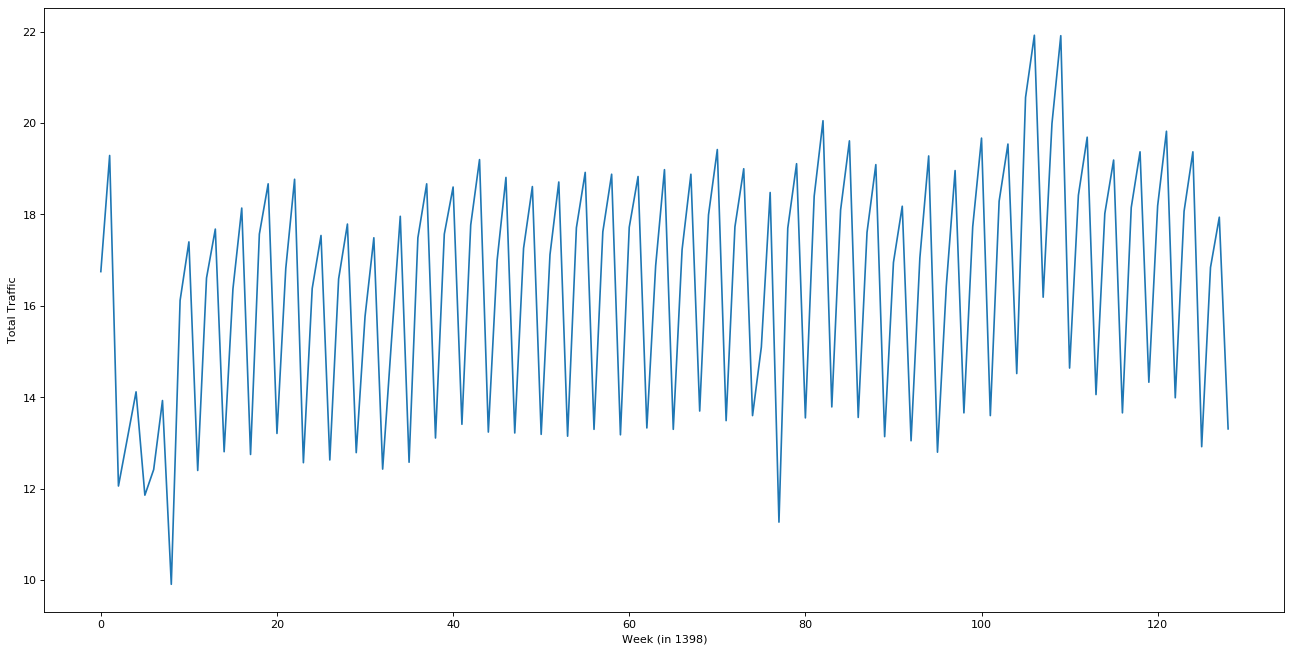

In [8]:
print(dataTotalTraffic)
plt.figure(num = None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dataTotalTraffic)
plt.xlabel('Week (in 1398)')
plt.ylabel('Total Traffic')

In [7]:
data

,week,Value,Total Traffic,3G-CS TRAFFIC (Million Erl),2G Traffic \n(Million Erl),CC2,CC3,CSQI,OCS QI,SMS Number (Million),...,3G Carrier,4G Carrier,2G CS- Drop,3G CS- Drop,Weighted CS drop,2G CS- CSSR,3G CS- CSSR,Weighted CS-CSSR,4G Carrier per 5MHz,Avg 4G Carrier in MHz
0,W01-1398,Avg,16.75,7.448,9.30,83.38,89.30,96.40,98.06,679,...,137168.0,55083.0,0.37,0.13,0.26,98.85,99.73,99.24,"192,913",17.55
1,W01-1398,Max,19.29,8.955,10.34,NaN,NaN,NaN,NaN,808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W01-1398,Min,12.06,4.874,7.18,NaN,NaN,NaN,NaN,434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W02-1398,Avg,13.09,5.360,7.73,81.31,88.10,95.99,97.78,557,...,137567.0,55157.0,0.41,0.17,0.31,98.72,99.82,99.17,"165,635",17.55
4,W02-1398,Max,14.12,5.777,8.34,NaN,NaN,NaN,NaN,816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,W42-1398,Max,19.37,9.779,9.59,NaN,NaN,NaN,NaN,716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,W42-1398,Min,12.92,5.843,7.08,NaN,NaN,NaN,NaN,414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,W43-1398,Avg,16.84,8.356,8.49,86.40,90.92,97.02,96.89,646,...,143810.0,62293.0,0.35,0.10,0.22,99.07,99.72,99.39,"236,664",18.79
127,W43-1398,Max,17.94,9.062,8.88,NaN,NaN,NaN,NaN,788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def isStationary(data):    
    rollingMean = data.rolling(window = 12).mean()
    rollingStd = data.rolling(window = 12).std()
    plt.figure(num = None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(data, color = 'blue', label = 'Original')
    plt.plot(rollingMean, color = 'red', label = 'Rolling Mean')
    plt.plot(rollingStd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.show()

    result = adfuller(data)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

As we observe below, the data is stationary (time invarient mean and variance)

# There are two ways to check if it is stationary or not:
1. Rolling Statistics: Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).


2. Augmented Dickey-Fuller Test: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics.

Explanation:

The Dickey-Fuller test is testing if  
ϕ
=
0
  in this model of the data:
y
(t)
=
α
+
β
t
+
ϕ
y
(t
−
1)
+
e
(t)

The Augmented Dickey-Fuller test allows for higher-order autoregressive processes by including  
Δ
y
t
−
p
  in the model. But our test is still if  
γ
=
0
 .
Δ
y
t
=
α
+
β
t
+
γ
y
t
−
1
+
δ
1
Δ
y
t
−
1
+
δ
2
Δ
y
t
−
2
+
…
 

The null hypothesis for both tests is that the data are non-stationary (In tests there are two hypothesis: a Hypothesis testing being conducted with a defined Null Hypothesis (H0) and a corresponding Alternate hypothesis (HA).. We want to REJECT the null hypothesis for this test, so we want a p-value of less than 0.05 (or smaller).

-What is p-value?
 
 A p-value is the probability under a specified statistical model that a statistical summary of the data (e.g., the sample mean difference between two compared groups) would be equal to or more extreme than its observed value.

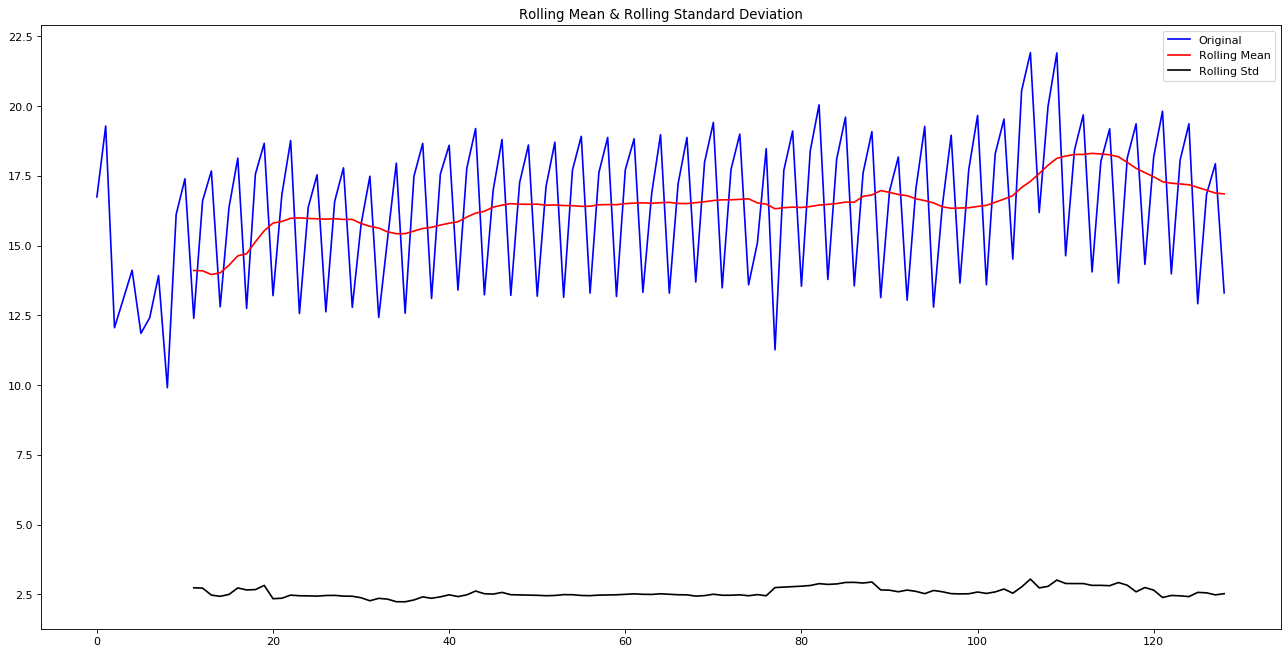

ADF Statistic: -2.4622220148698357
p-value: 0.12493871772846837
Critical Values:
	1%: -3.487517288664615
	5%: -2.8865777180380032
	10%: -2.5801239192052012


In [9]:
isStationary(dataTotalTraffic)

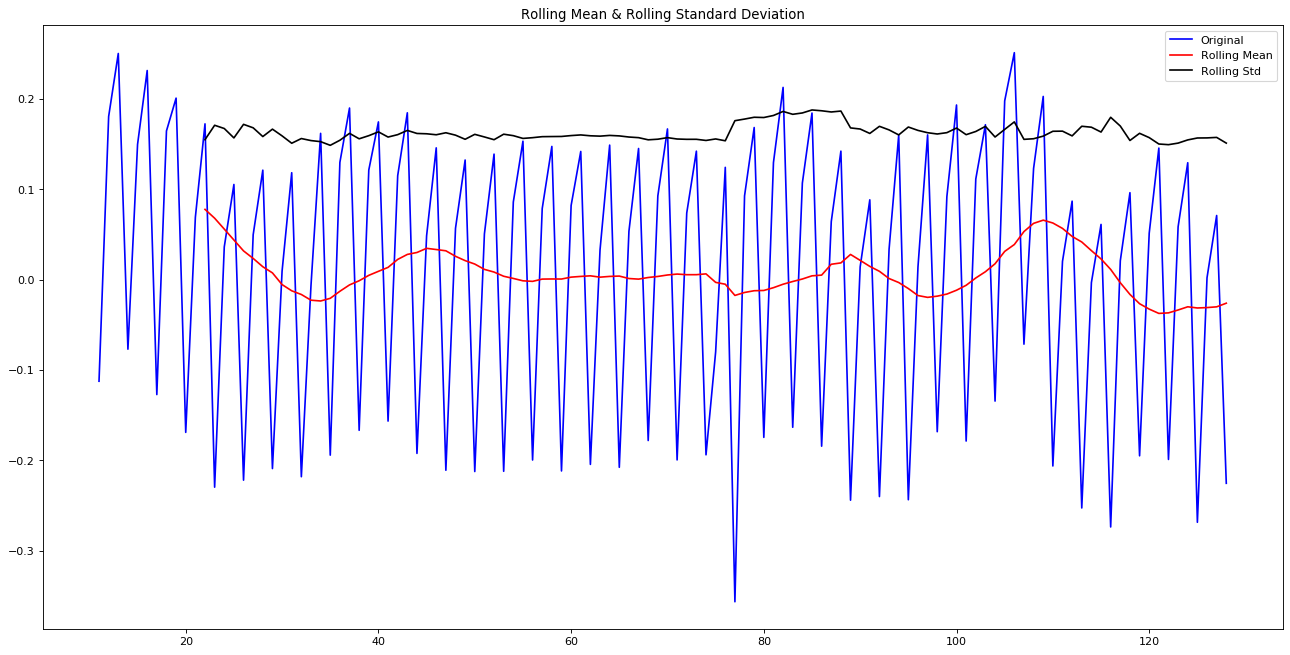

ADF Statistic: -3.556240051851705
p-value: 0.006654889558178774
Critical Values:
	1%: -3.4948504603223145
	5%: -2.889758398668639
	10%: -2.5818220155325444


In [10]:
###########################################################
#In case you want to make sure it is statics, run this cell.
dataTotalTrafficLog = np.log(dataTotalTraffic)
dataLogMinusMean = dataTotalTrafficLog - dataTotalTrafficLog.rolling(window = 12).mean()
dataLogMinusMean.dropna(inplace = True)
isStationary(dataLogMinusMean)
###########################################################

# ARIMA

Two models have been implemented: ARIMA(2, 1, 2) and ARIMA(1, 1, 2)

1. ARIMA(1,1,2) without constant = damped-trend linear exponential smoothing:

Ŷt   =   Yt-1  +  ϕ1 (Yt-1 - Yt-2 ) - θ1et-1 - θ1et-1



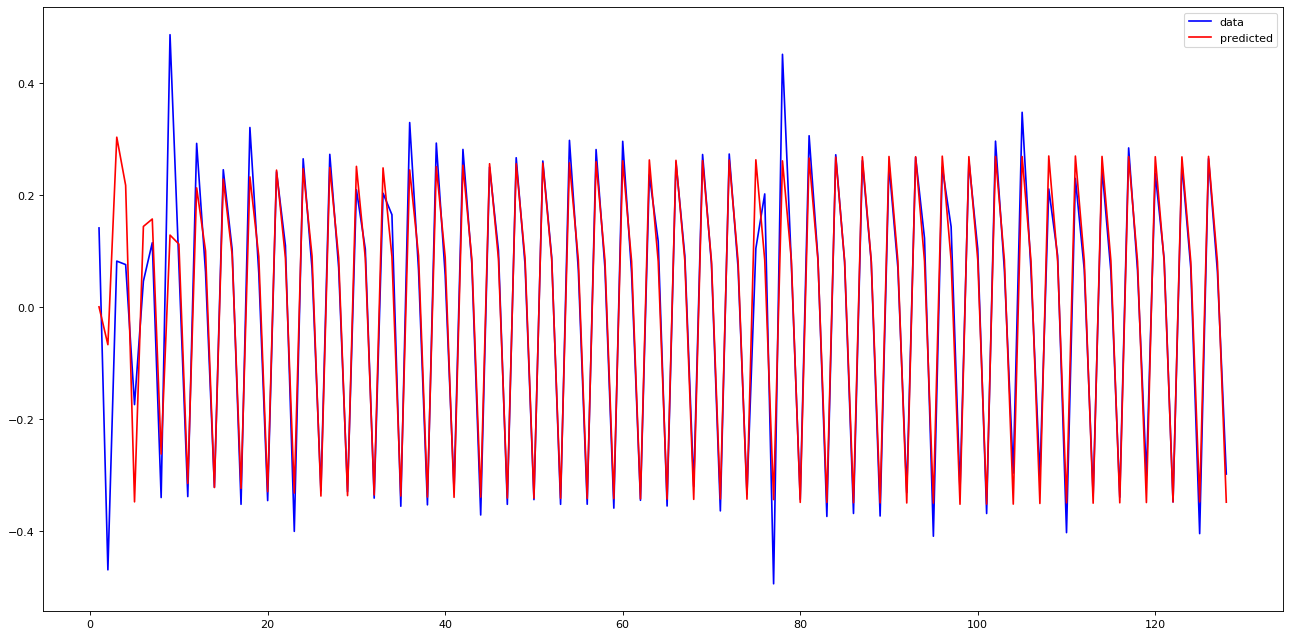

In [11]:
#ARIMA
#decomposition = seasonal_decompose(dataTotalTrafficLog) 
model = ARIMA(dataTotalTrafficLog, order=(2,1,2))
results = model.fit(disp=-1)
dataTotalTrafficLogShift = dataTotalTrafficLog - dataTotalTrafficLog.shift(1)
dataTotalTrafficLogShift.dropna(inplace=True)
plt.figure(num = None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dataTotalTrafficLogShift, color = 'blue', label = 'data')
plt.plot(results.fittedvalues, color='red', label = 'predicted')
plt.legend(loc = 'best')

ARIMA(1,1,2) without constant = damped-trend linear exponential smoothing:
For modeling ARIME we use daped-trend linear exponetial smoothing. 


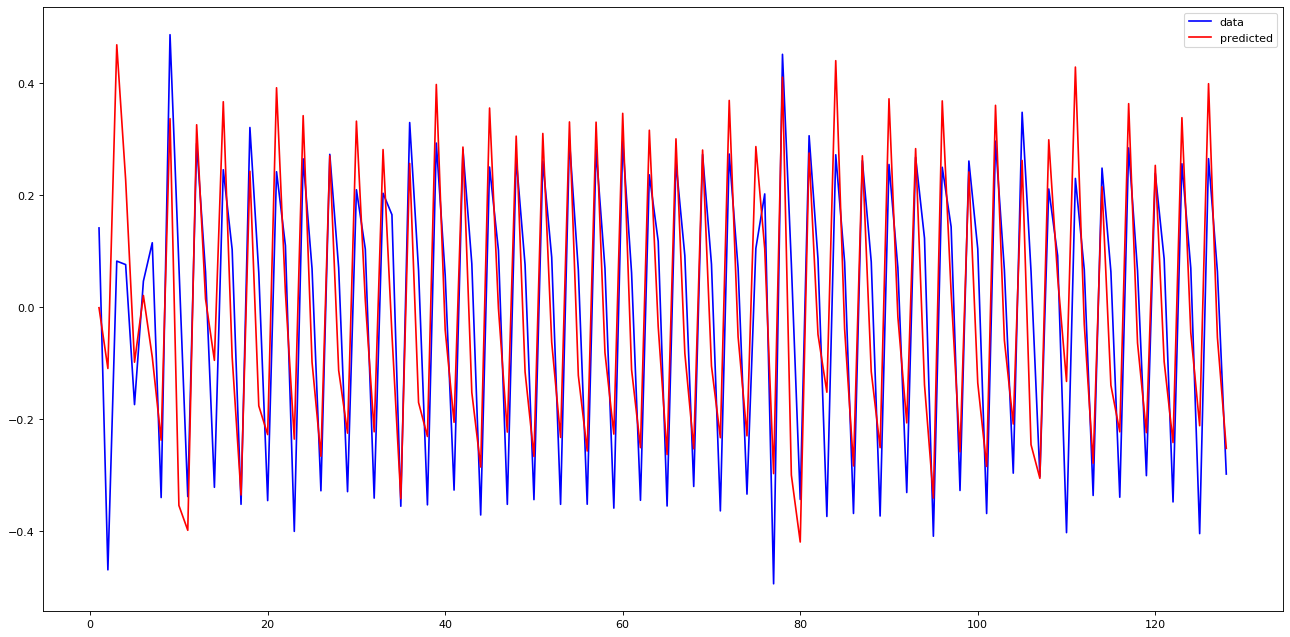

In [18]:
model = ARIMA(dataTotalTrafficLog, order=(1,1,2))
results = model.fit(disp=-1)
dataTotalTrafficLogShift = dataTotalTrafficLog - dataTotalTrafficLog.shift(1)
dataTotalTrafficLogShift.dropna(inplace=True)
plt.figure(num = None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dataTotalTrafficLogShift, color = 'blue', label = 'data')
plt.plot(results.fittedvalues, color='red', label = 'predicted')
plt.legend(loc = 'best')

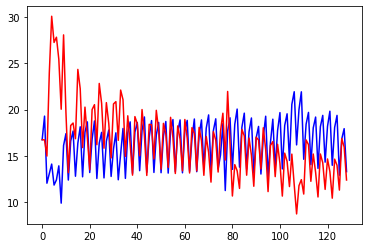

In [14]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dataTotalTrafficLog['Total Traffic'].iloc[0], index=dataTotalTrafficLog.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dataTotalTraffic, color = 'blue')
plt.plot(predictions_ARIMA, color = 'red')

# ARMA


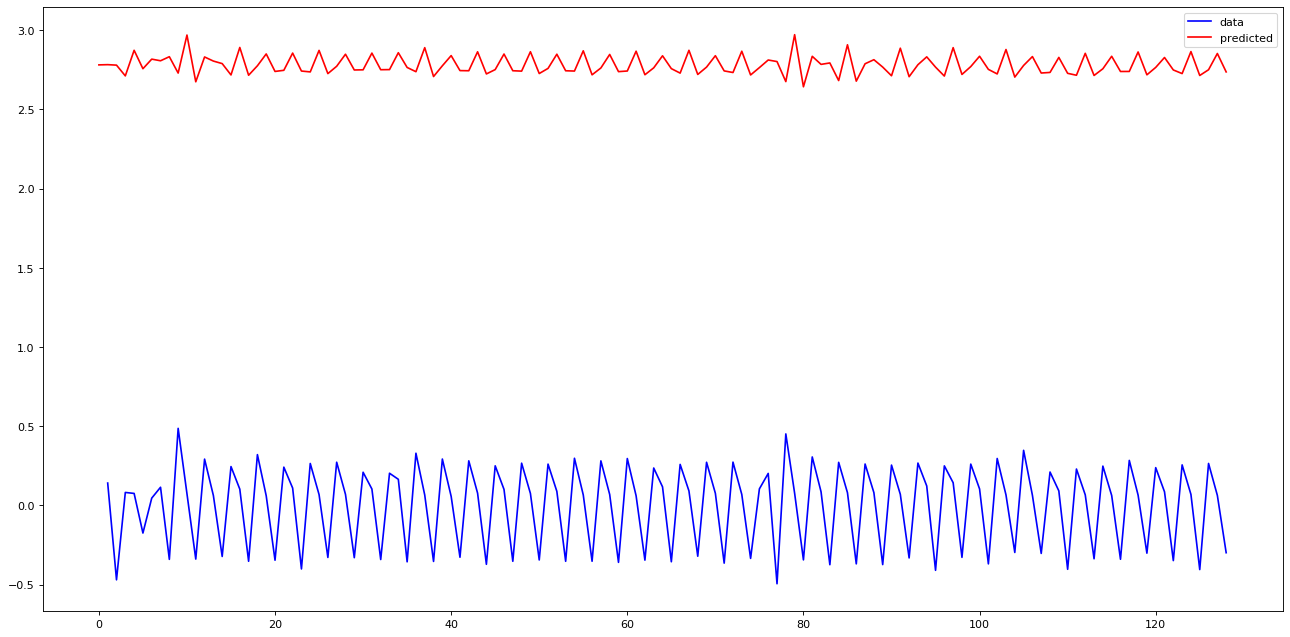

In [17]:
model = ARMA(dataTotalTrafficLog, (1,2))
results = model.fit()
dataTotalTrafficLogShift = dataTotalTrafficLog - dataTotalTrafficLog.shift(1)
dataTotalTrafficLogShift.dropna(inplace=True)
plt.figure(num = None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dataTotalTrafficLogShift, color = 'blue', label = 'data')
plt.plot(results.fittedvalues, color='red', label = 'predicted')
plt.legend(loc = 'best')
